#### Import and ENV

In [1]:
import torch.nn as nn
import torch
import torchvision
from torchsummary import summary
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision import transforms as T
from torchvision.datasets import CIFAR10
from torchmetrics import Accuracy
import importlib
# Local files
import data
importlib.reload(data)
import encoder
importlib.reload(encoder)
import decoder
importlib.reload(decoder)
import main
importlib.reload(main)
import VAE
importlib.reload(VAE)
import training_VAE
importlib.reload(training_VAE)
# Random Seed
torch.manual_seed(0)

In [2]:
bsn = [128, 64]
# bsn = [128, 64, 32, 10]
betas= [1,2]
for i in bsn:
    for j in betas:
        main.main(bottle_neck = i, experiment_type=1, beta=j, n_epoch=30, lr= 0.001)
        print(f"Experiment 1 Done bottle size: {i} Beta{j}")
        # main.main(bottle_neck = i, experiment_type=2, beta=j, n_epoch=1)
        # print(f"Done bottle size: {i} Beta{j}")
        # main.main(bottle_neck = i, experiment_type=3, beta=j, n_epoch=1)
        # print(f"Done bottle size: {i} Beta{j}")

Files already downloaded and verified
Files already downloaded and verified
Starting Training from Scratch.

rec_loss tensor(1111.7458, device='cuda:0')lapsed in epoch.
kl_loss tensor(60.1291, device='cuda:0')
rec_loss tensor(1174.3171, device='cuda:0')
kl_loss tensor(63.4102, device='cuda:0')
rec_loss tensor(1184.1132, device='cuda:0')
kl_loss tensor(62.6173, device='cuda:0')
rec_loss tensor(1342.4661, device='cuda:0')
kl_loss tensor(62.6546, device='cuda:0')
rec_loss tensor(1245.1517, device='cuda:0')
kl_loss tensor(67.4437, device='cuda:0')
rec_loss tensor(1266.1996, device='cuda:0')
kl_loss tensor(66.3911, device='cuda:0')
rec_loss tensor(1067.2627, device='cuda:0')
kl_loss tensor(63.5814, device='cuda:0')
rec_loss tensor(1198.9617, device='cuda:0')
kl_loss tensor(62.1863, device='cuda:0')
rec_loss tensor(1274.6023, device='cuda:0')
kl_loss tensor(62.2255, device='cuda:0')
rec_loss tensor(1229.8392, device='cuda:0')
kl_loss tensor(62.2400, device='cuda:0')
rec_loss tensor(1214.4021

KeyboardInterrupt: 

True

## **DataLoader**

In [ ]:
# from data import get_datasets,dataset_to_dataloader
train_ds, val_ds, test_ds = data.get_datasets()
dataloader_train = data.dataset_to_dataloader(train_ds,batch_size = 64)
dataloader_test = data.dataset_to_dataloader(test_ds, batch_size = 64)
dataloader_val = data.dataset_to_dataloader(val_ds, batch_size = 64)

Files already downloaded and verified
Files already downloaded and verified


## **AutoEncoder Model**

https://github.com/SashaMalysheva/Pytorch-VAE

## **Training** 

In [ ]:
z_dim = 512
latent_dim = 10
encoder_ = encoder.resnet18(pretrained=False)
encoder_.avgpool = nn.AdaptiveAvgPool2d((1, 1))
# encoder_.fc = nn.Linear(in_features=512, out_features=z_dim, bias=True)
encoder_.fc = nn.Identity()

decoder_ = decoder.ResNet18Dec(z_dim=latent_dim)
model = VAE.VAE(encoder_,decoder_,z_dim,latent_dim).to(torch.device('cuda:0'))
# PATH = "/home/alisa/DL_AutoEncoder/DL-AutoEncoder/VAE_NoNorm.pt"
# model.load_state_dict(torch.load(PATH))

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=5e-03)
model, history = training_VAE.train(
    model,
    optimizer,
    dataloader_train,
    dataloader_val,
    save_file_name='VAE_V2.pt',
    max_epochs_stop=5,
    n_epochs=10,
    print_every=1,
    beta=1)

print(history)
history.to_csv('VAE_History.csv') 

Starting Training from Scratch.

Epoch: 0	100.00% complete. 144.78 seconds elapsed in epoch.
Epoch: 0 	Training Loss: 3810.4893 	Validation Loss: 3451.7048
Epoch: 1	100.00% complete. 142.82 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 2037.4932 	Validation Loss: 3348.3166
Epoch: 2	100.00% complete. 143.04 seconds elapsed in epoch.
Epoch: 2 	Training Loss: 1196.4199 	Validation Loss: 3260.2665
Epoch: 3	100.00% complete. 143.21 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 1114.6077 	Validation Loss: 3169.9329
Epoch: 4	100.00% complete. 143.61 seconds elapsed in epoch.
Epoch: 4 	Training Loss: 1105.3598 	Validation Loss: 3139.6729
Epoch: 5	100.00% complete. 144.78 seconds elapsed in epoch.
Epoch: 5 	Training Loss: 1082.3815 	Validation Loss: 3136.7946
Epoch: 6	100.00% complete. 142.98 seconds elapsed in epoch.
Epoch: 6 	Training Loss: 1068.8073 	Validation Loss: 3076.6271
Epoch: 7	100.00% complete. 144.52 seconds elapsed in epoch.
Epoch: 7 	Training Loss: 1054.2219 	Validation

In [ ]:
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5           [-1, 64, 16, 16]          36,864
       BatchNorm2d-6           [-1, 64, 16, 16]             128
              ReLU-7           [-1, 64, 16, 16]               0
            Conv2d-8           [-1, 64, 16, 16]          36,864
       BatchNorm2d-9           [-1, 64, 16, 16]             128
             ReLU-10           [-1, 64, 16, 16]               0
       BasicBlock-11           [-1, 64, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          36,864
      BatchNorm2d-13           [-1, 64, 16, 16]             128
             ReLU-14           [-1, 64,

In [ ]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        with torch.no_grad():
          for t, m, s in zip(tensor, self.mean, self.std):
              t.mul_(s).add_(m)
              # The normalize code -> t.sub_(m).div_(s)
          return tensor

In [ ]:
from torchvision.utils import make_grid
unorm = UnNormalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2471, 0.2435, 0.2616))

def peek_results(dataloader, model):
  for img,lb in dataloader:
    fig, ax = plt.subplots(figsize=(16,8))
    fig1, ax1 = plt.subplots(figsize=(16,8))
    ax.set_xticks([]); ax.set_yticks([])
    ax1.set_xticks([]); ax1.set_yticks([])
    img_output,_,_ = model(img.cuda())
    img_output = img_output.cpu()
    print(img_output.size())
    ax.imshow(make_grid(unorm(img_output), nrow=16).permute(1,2,0))
    #ax.imshow(make_grid(img_output, nrow=16).permute(1,2,0))
    ax1.imshow(make_grid(unorm(img), nrow=16).permute(1,2,0))
    break


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 3, 32, 32])


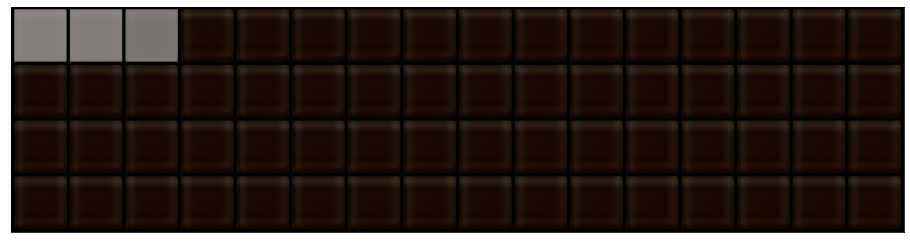

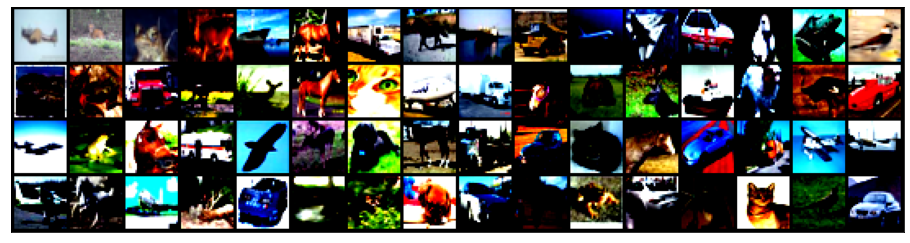

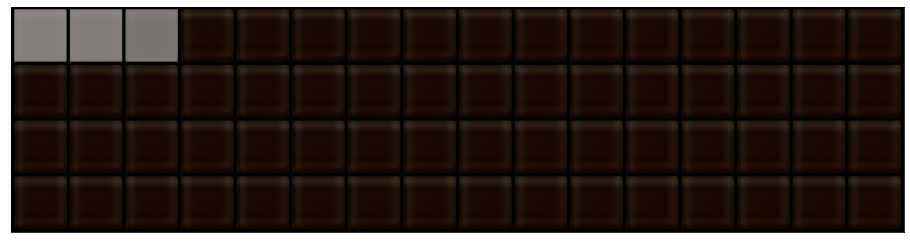

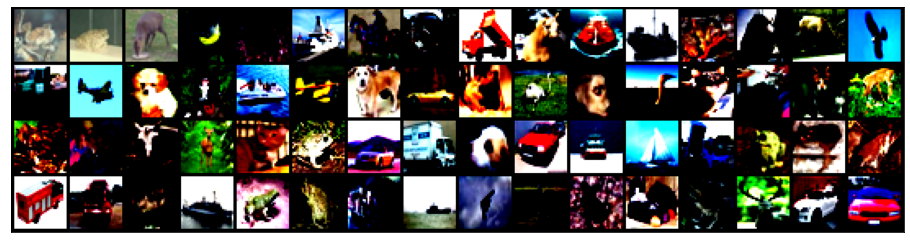

In [ ]:
peek_results(dataloader_test, model)
peek_results(dataloader_train, model)

In [ ]:
model_copy = copy.deepcopy(model)

with torch.no_grad():
    model.weight.fill_(1.)

NameError: name 'copy' is not defined